In [33]:
url="http://data.dft.gov.uk/road-accidents-safety-data/MakeModel2016.zip"
a=pd.read_csv(url, compression='zip')

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2016.zip"
b=pd.read_csv(url, compression='zip')

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip"
c=pd.read_csv(url, compression='zip')

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip"
d=pd.read_csv(url, compression='zip')



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1]:
import pandas as pd

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip"
c=pd.read_csv(url, compression='zip')

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip"
d=pd.read_csv(url, compression='zip')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
c = c[['Accident_Index','Date','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions']]
d = d[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle']]

In [3]:
# c.groupby('Road_Surface_Conditions').count() /////// Important stuff
d.shape

(252500, 5)

In [4]:
c.head()

,Accident_Index,Date,Day_of_Week,Time,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,2016010000005,01/11/2016,3,02:30,3,30.0,5,1,1
1,2016010000006,01/11/2016,3,00:37,3,30.0,4,1,1
2,2016010000008,01/11/2016,3,01:25,3,30.0,4,1,1
3,2016010000016,01/11/2016,3,09:15,3,30.0,1,1,1
4,2016010000018,01/11/2016,3,07:53,3,40.0,1,1,1


In [5]:
d.head()

,Accident_Index,Vehicle_Reference,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,2016010000005,1,1,51,-1
1,2016010000005,2,1,23,4
2,2016010000006,1,2,36,1
3,2016010000008,1,1,24,5
4,2016010000016,1,1,55,7


In [6]:
l = [c,d]
# joined = pd.concat(l,join_axes=[a.Accident_index]) #Works with axis=1, but has two columns of accident_index
joined = pd.merge(c, d, on='Accident_Index')

In [7]:
joined.head(10)

,Accident_Index,Date,Day_of_Week,Time,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Reference,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,2016010000005,01/11/2016,3,02:30,3,30.0,5,1,1,1,1,51,-1
1,2016010000005,01/11/2016,3,02:30,3,30.0,5,1,1,2,1,23,4
2,2016010000006,01/11/2016,3,00:37,3,30.0,4,1,1,1,2,36,1
3,2016010000008,01/11/2016,3,01:25,3,30.0,4,1,1,1,1,24,5
4,2016010000016,01/11/2016,3,09:15,3,30.0,1,1,1,1,1,55,7
5,2016010000018,01/11/2016,3,07:53,3,40.0,1,1,1,1,1,20,11
6,2016010000018,01/11/2016,3,07:53,3,40.0,1,1,1,2,1,28,-1
7,2016010000019,01/11/2016,3,09:29,3,30.0,1,1,1,1,2,30,10
8,2016010000019,01/11/2016,3,09:29,3,30.0,1,1,1,2,1,27,5
9,2016010000020,01/11/2016,3,08:53,5,30.0,1,1,1,1,1,33,2


In [8]:
joined.shape

(252500, 13)

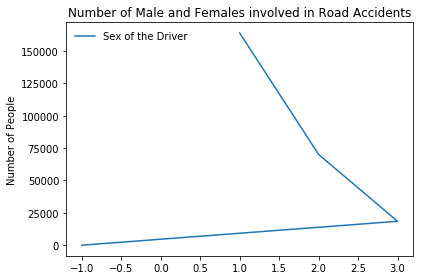

In [10]:
import matplotlib.pyplot as plt
new = joined[['Sex_of_Driver']]
new_1 = pd.value_counts(new['Sex_of_Driver'])
# new_1.plot(kind='bar') Simple pl


fig, ax = plt.subplots()
ax.plot(new_1)
ax.legend(['Sex of the Driver'],loc='upper left',frameon=False)
ax.set_title('Number of Male and Females involved in Road Accidents')
ax.set_ylabel('Number of People')
fig.tight_layout()

In [23]:
new

,Sex_of_Driver
0,1
1,1
2,2
3,1
4,1
5,1
6,1
7,2
8,1
9,1


In [11]:
new = new.ix[new['Sex_of_Driver']!=1]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [12]:
new

,Sex_of_Driver
2,2
7,2
11,2
14,3
18,2
20,3
21,2
31,2
34,2
38,2
